# Assignment 13.2 - Plotting in Seaborn

The objective of this assignment is to generate a masterplot for a dataset containing a minimum of 4 continuous variables and 1 categorical variable. The plot should give insight into the following:
1. Probability distributions
2. Bivariate relationships
3. Whether the distributions or the relationships vary across groups
4. Accompany your plot with a written description of what you see

We start by importing the appropriate libraries and uploading the csv:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('./Thinkful/2016.csv')

Data exploration due diligence:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB


In [4]:
df.shape

(157, 13)

In [5]:
df.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [6]:
df.tail(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

The planned approach with this assignment is to graph the relationships of 4 different continuous variables from the dataset. Specifically, I will be using a seaborn.pairplot() to review the relationships of the following continuous variables:
* Happiness Score
* Economy (GDP per Capita)
* Health (Life Expectancy)
* Generosity

I will group these variables by Region.

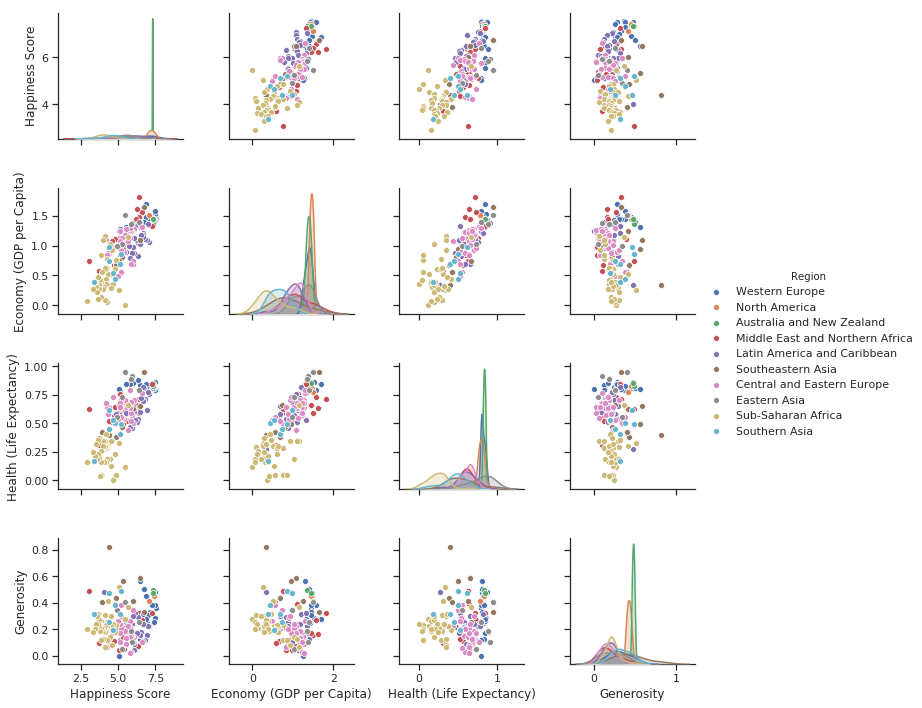

In [8]:
sns.set(style='ticks')
sns.pairplot(data = df, hue = 'Region', vars = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Generosity'], kind = 'scatter')

There's certainly a lot going on in each of these graphs due to the high number of Region values. What I'll do now is take this same plot and drill down into the top 3 regions with the highest Happiness Score. To do that, I'll need to calculate average Happiness Score grouped by region.

In [9]:
df.groupby(['Region'])['Happiness Score'].mean().sort_values(ascending=False)

Region
Australia and New Zealand          7.323500
North America                      7.254000
Western Europe                     6.685667
Latin America and Caribbean        6.101750
Eastern Asia                       5.624167
Middle East and Northern Africa    5.386053
Central and Eastern Europe         5.370690
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Name: Happiness Score, dtype: float64

Based on these results, I'll run a seaborn.pairplot() with Western Europe, Latin America/Caribbean and Eastern Asia, acknowledging that Australia/New Zealand and North America will only produce 2 data plots each. To do so, I must remove the other Regions from the dataset.

In [10]:
omitted_Regions = ['North America','Australia and New Zealand','Middle East and Northern Africa','Central and Eastern Europe','Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa' ]

for region in omitted_Regions:
    df = df[df['Region'] != region]

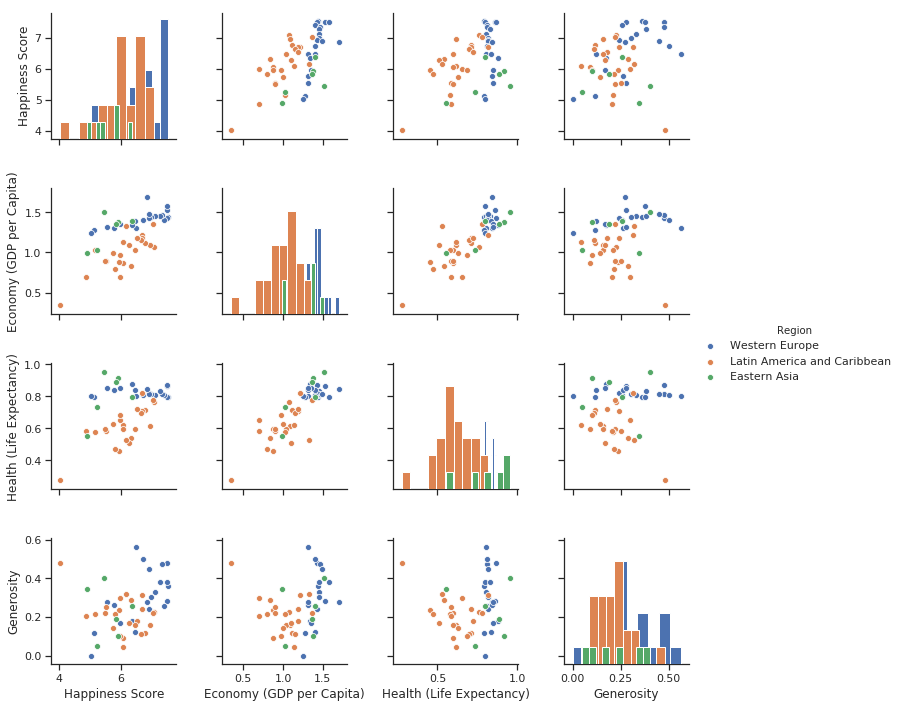

In [13]:
sns.set(style='ticks')
sns.pairplot(data = df, hue = 'Region', vars = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Generosity'], kind = 'scatter', diag_kind = 'hist')

What we can derive from these plots is that there is a disparity in the countries within each region, but there does appear to be a direct correlation between Happiness score and the other three continuous variables, i.e. the greater the GDP per Capita, Life Expectancy and Generosity, the higher the Happiness score within each region.